In [5]:
import os
import pickle
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
import scipy
from Functions import renormalize, scomplex, plotting, support
import matplotlib.pyplot as plt
from scipy.stats import entropy as sp_entropy
import networkx as nx

plt.rcParams["text.usetex"] = True
colors = np.array(
    [
        [0.3647, 0.2824, 0.1059],
        [0.8549, 0.6314, 0.3294],
        [0.4745, 0.5843, 0.5373],
        [0.4745, 0.3843, 0.7373],
        [107.0 / 255, 42.0 / 255, 2.0 / 255],
    ]
)
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 13

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [165]:
def generate_ER(N):
    G = nx.erdos_renyi_graph(N, 1.1*np.log(N)/N, seed=None, directed=False)
    sc = {"nodes": np.reshape(np.array(G.nodes),(-1,1)), "n0":N, "edges":np.array(G.edges)}
    all_cliques= nx.enumerate_all_cliques(G)
    sc["faces"]= np.array([x for x in all_cliques if len(x)==3])
    sc["n1"] = len(sc["edges"])
    sc["tetrahedra"] = np.zeros((0,4))
    sc["4-simplices"] = np.zeros((0,5))
    sc["n2"] = sc["faces"].shape[0]
    sc["n3"] = 0
    sc["n4"] = 0
    return sc

def generate_BA(N):
    G = nx.barabasi_albert_graph(N, 2, seed=None, initial_graph=None)
    sc = {"nodes": np.reshape(np.array(G.nodes),(-1,1)), "n0":N, "edges":np.array(G.edges)}
    sc["n1"] = len(sc["edges"])
    sc["faces"] = np.zeros((0,3))
    sc["tetrahedra"] = np.zeros((0,4))
    sc["4-simplices"] = np.zeros((0,5))
    sc["n2"] = 0
    sc["n3"] = 0
    sc["n4"] = 0
    return sc

In [125]:
ncs = 50
rep = 10
N = 1000
d = 3
s = 1


suff = f"d{d}s{s}"
#suff = "BA"

path = "../Tests/Experiments_random/"+suff


deg_dist = []

for r in range(rep):
    rowr = []
    sc = scomplex.NGF(d = d, N = N, s = s, beta = 0.1)
    #sc = generate_BA(N)
    edge_dict, face_dict, tet_dict = scomplex.make_dict(sc)
    deg = scomplex.generalized_degree(
        sc, edge_dict, face_dict, tet_dict, d
    )
    for i in range(d+1):
        rowi = []
        order = i
        nc_space = np.floor(np.linspace(0,sc[f"n{order}"],ncs)).astype(int)
        for n in range(ncs):
            rown = []
            print(f"{r}: {n}")
            rho = np.random.rand(sc[f"n{order}"],sc[f"n{order}"])
            new_sc, __, __, __= renormalize.renormalize_simplicial_VARIANTS(sc, order = order, rho = rho, nc = nc_space[n])                
            new_edge_dict, new_face_dict, new_tet_dict = scomplex.make_dict(new_sc)
            new_deg = scomplex.generalized_degree(
                new_sc, new_edge_dict, new_face_dict, new_tet_dict, d
            )
            # repetitions x Lk x deg type x tau
            for j in range(d):
                rown.append(new_deg[j])
            rowi.append(rown)
        rowr.append(rowi)
    deg_dist.append(rowr)

if not os.path.exists(path):
    os.makedirs(path)

with open(path + "/deg_dist.pkl", "wb") as f:
    pickle.dump(deg_dist, f)

0: 0
0: 1
0: 2
0: 3
0: 4
0: 5
0: 6
0: 7
0: 8
0: 9
0: 10
0: 11
0: 12
0: 13
0: 14
0: 15
0: 16
0: 17
0: 18
0: 19
0: 20
0: 21
0: 22
0: 23
0: 24
0: 25
0: 26
0: 27
0: 28
0: 29
0: 30
0: 31
0: 32
0: 33
0: 34
0: 35
0: 36
0: 37
0: 38
0: 39
0: 40
0: 41
0: 42
0: 43
0: 44
0: 45
0: 46
0: 47
0: 48
0: 49
0: 0
0: 1
0: 2
0: 3
0: 4
0: 5
0: 6
0: 7
0: 8
0: 9
0: 10
0: 11
0: 12
0: 13
0: 14
0: 15
0: 16
0: 17
0: 18
0: 19
0: 20
0: 21
0: 22
0: 23
0: 24
0: 25
0: 26
0: 27
0: 28
0: 29
0: 30
0: 31
0: 32
0: 33
0: 34
0: 35
0: 36
0: 37
0: 38
0: 39
0: 40
0: 41
0: 42
0: 43
0: 44
0: 45
0: 46
0: 47
0: 48
0: 49
0: 0
0: 1
0: 2
0: 3
0: 4
0: 5
0: 6
0: 7
0: 8
0: 9
0: 10
0: 11
0: 12
0: 13
0: 14
0: 15
0: 16
0: 17
0: 18
0: 19
0: 20
0: 21
0: 22
0: 23
0: 24
0: 25
0: 26
0: 27
0: 28
0: 29
0: 30
0: 31
0: 32
0: 33
0: 34
0: 35
0: 36
0: 37
0: 38
0: 39
0: 40
0: 41
0: 42
0: 43
0: 44
0: 45
0: 46
0: 47
0: 48
0: 49
0: 0
0: 1
0: 2
0: 3
0: 4
0: 5
0: 6
0: 7
0: 8
0: 9
0: 10
0: 11
0: 12
0: 13
0: 14
0: 15
0: 16
0: 17
0: 18
0: 19
0: 20
0: 21
0: 22
0:

In [41]:
suff = "ER"
d = 1
path = f"../Tests/Experiments_random/{suff}"
with open(path + "/deg_dist.pkl", "rb") as f:
    deg_dist = pickle.load(f)

dim = support.list_dim(deg_dist)
renorms = dim[1]
d = dim[3] 
ncs = dim[2]
rep = dim[0]

In [46]:
def KS(deg1,deg2):
    test = scipy.stats.kstest(deg1, deg2)
    return test.statistic 

def mean_degree(deg1,deg2):
    return np.mean(deg2)
 
def density(deg1,deg2,d):
    N = len(deg2)
    maxedges = scipy.special.binom(N,d+1)
    return np.sum(deg2)/((d+1)*maxedges)

def JS(deg1,deg2):
    dmax = int(max(np.max(deg1),np.max(deg2)))
    p1 = np.zeros(dmax+1)
    p2 = np.zeros(dmax+1)
    for i in deg1:
        p1[int(i)] += 1
    for i in deg2:
        p2[int(i)] += 1
    p1 = p1/np.sum(p1)
    p2 = p2/np.sum(p2)
    p12 = 0.5 * (p1 + p2)
    jsd = 0.5 * (sp_entropy(p1, p12, base=2) + sp_entropy(p2, p12, base=2))
    return jsd

In [47]:
measure = density
logg = False

deg_distance = np.zeros((rep,d+1,ncs,d))
Ns = np.zeros((rep,d+1,ncs))
for r in range(rep):
    for i in range(d+1):
        for n in range(ncs):
            Ns[r,i,n] = len(deg_dist[r][i][n][0])
            for j in range(d):
                degg1 = deg_dist[r][i][0][j]
                degg2 = deg_dist[r][i][n][j]
                if len(degg2) == 0:
                    degg2 = [0]
                deg_distance[r,i,n,j] = measure(degg1,degg2,d)

N = Ns[0,0,0]


/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_5298/431521561.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(deg2)/((d+1)*maxedges)


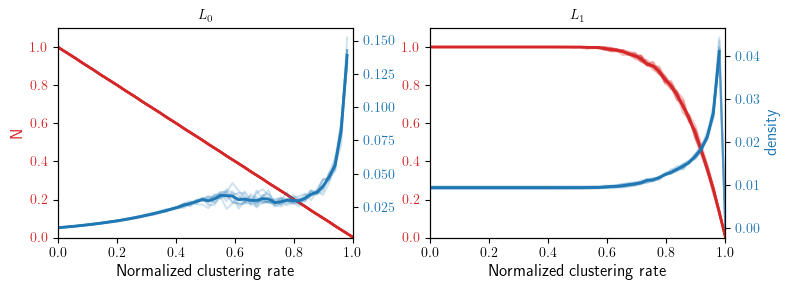

In [48]:
fig, axv = plt.subplots(d,d+1,figsize = (4*(d+1),3*d))

for j in range(d):
    for i in range(d+1):
        color = 'tab:red'
        if d == 1:
            ax1 = axv[i]
        else:
            ax1 = axv[j,i]
        ax1.set_title("$L_"+str(i)+"$")
        ax1.set_xlabel('Normalized clustering rate')
        ax1.set_ylabel('N', color=color)
        for r in range(rep):
            ax1.plot(np.linspace(0,1,ncs), Ns[r,i,:]/N, color=color, alpha = 0.3)

        ax1.plot(np.linspace(0,1,ncs), np.mean(Ns[:,i,:]/N,0), color = color, lw = 2)

        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_ylim(bottom = 0, top = 1.1)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel(measure.__name__, color=color)  # we already handled the x-label with ax1
        for r in range(rep):
            ax2.plot(np.linspace(0,1,ncs), deg_distance[r,i,:,j], color=color, alpha = 0.2)
        ax2.plot(np.linspace(0,1,ncs), np.mean(deg_distance[:,i,:,j],0), color = color, lw = 2)

        ax2.tick_params(axis='y', labelcolor=color)
        if logg:
            ax2.set_yscale('symlog',linthresh=0.01)
            ax2.set_ylim(bottom = 0, top = 1.1)
        ax1.set_xlim(0,1)
        if j < d-1: 
            ax1.set_xlabel("")
        if i < d:
            ax2.set_ylabel("")
        if i > 0:
            ax1.set_ylabel("")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(path + f"/deg_errors_{measure.__name__}.pdf", format="pdf")  # , bbox_inches="tight")


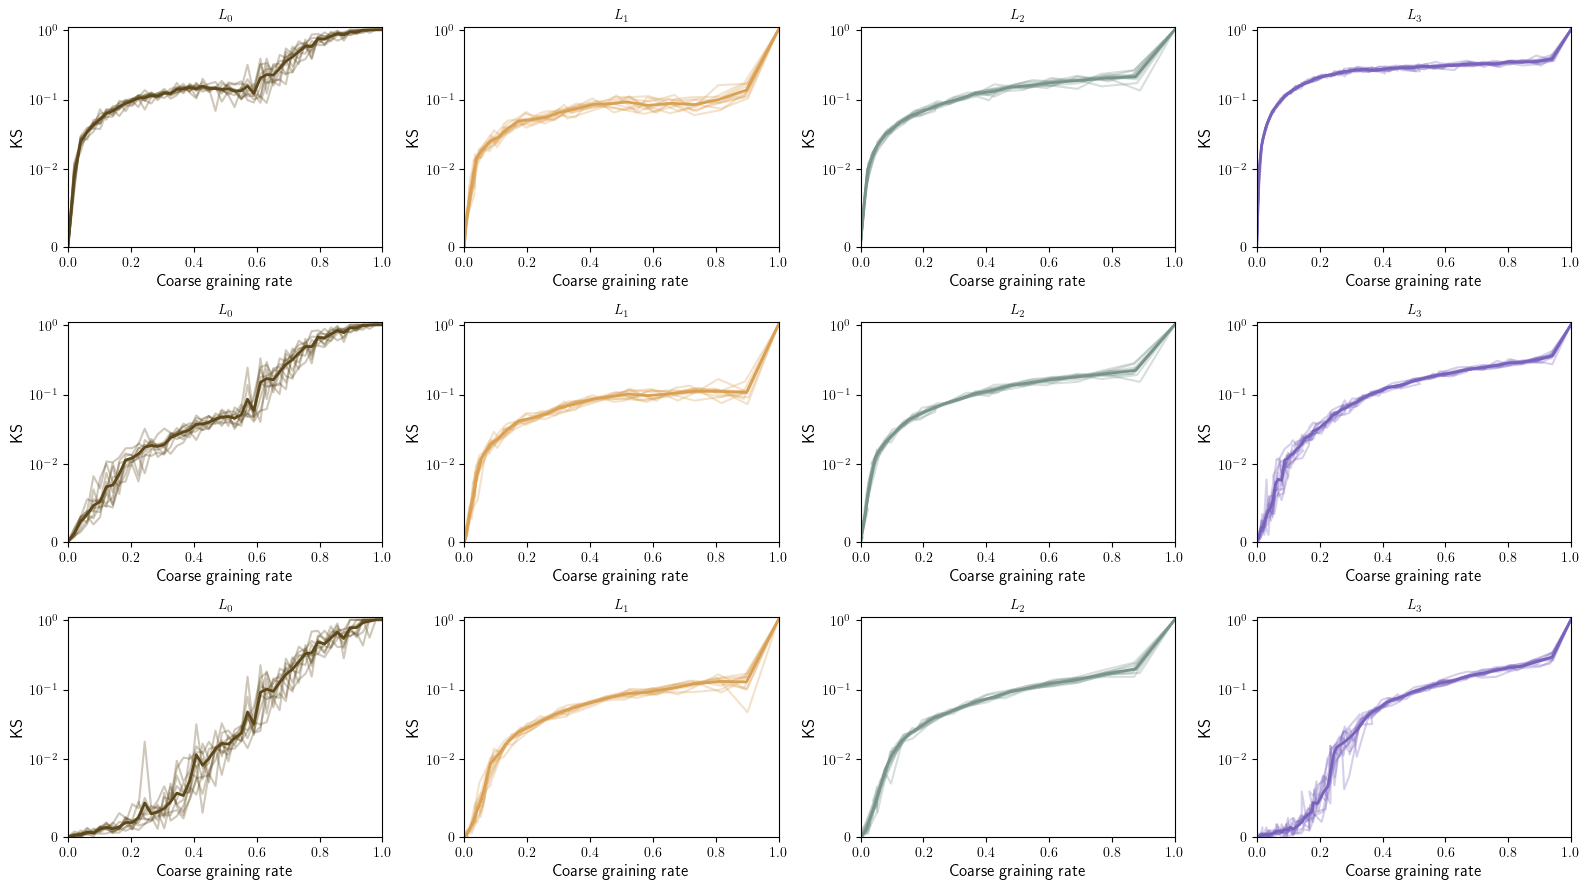

In [134]:
fig, axv = plt.subplots(d,d+1,figsize = (4*(d+1),3*d))

for degg in range(d):
    for norml in range(d+1):
        if d == 1:
             ax1 = axv[norml]
        else:
            ax1 = axv[degg,norml]
        ax1.set_title("$L_"+str(norml)+"$")
        ax1.set_xlabel('Coarse graining rate')
        ax1.set_ylabel(measure.__name__)
        for r in range(rep):
                ax1.plot(1-Ns[r,norml,:]/N, deg_distance[r,norml,:,degg], color=colors[norml,:], alpha = 0.3)

        ax1.plot(1-np.mean(Ns[:,norml,:]/N,0), np.mean(deg_distance[:,norml,:,degg],0), color = colors[norml,:], lw = 2)
        ax1.set_xlim(0,1)
        if logg:
            ax1.set_ylim(bottom = 0, top = 1.1)
            ax1.set_yscale('symlog',linthresh=0.01)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(path + f"/coarse_graining_rate_{measure.__name__}.pdf", format="pdf")  # , bbox_inches="tight")


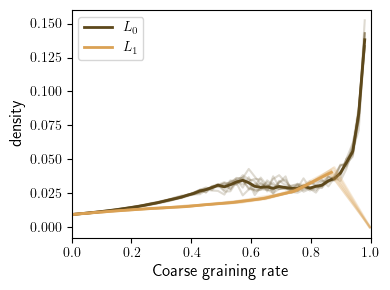

In [49]:
fig, axv = plt.subplots(1,d,figsize = (4*d,3))

for degg in range(d):
    if d == 1:
        ax1 = axv
    else:
        ax1 = axv[degg]
    #ax1.set_title("$L_"+str(norml)+"$")
    ax1.set_xlabel('Coarse graining rate')
    ax1.set_ylabel(measure.__name__)
    ax1.set_xlim(0,1)
    for norml in range(d+1):
        for r in range(rep):
                ax1.plot(1-Ns[r,norml,:]/N, deg_distance[r,norml,:,degg], color=colors[norml,:], alpha = 0.2)
        ax1.plot(1-np.median(Ns[:,norml,:]/N,0), np.median(deg_distance[:,norml,:,degg],0), color = colors[norml,:], lw = 2, label = f"$L_{norml}$")
    ax1.legend()

    if logg:    
        ax1.set_ylim(bottom = 0, top = 1.1)
        ax1.set_yscale('symlog',linthresh=0.01)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(path + f"/coarse_graining_rate_together_{measure.__name__}.pdf", format="pdf")  # , bbox_inches="tight")